How to use seaborn library and it's function.

In [5]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Install and Run Seaborn

In [6]:
import seaborn as sns

In [7]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

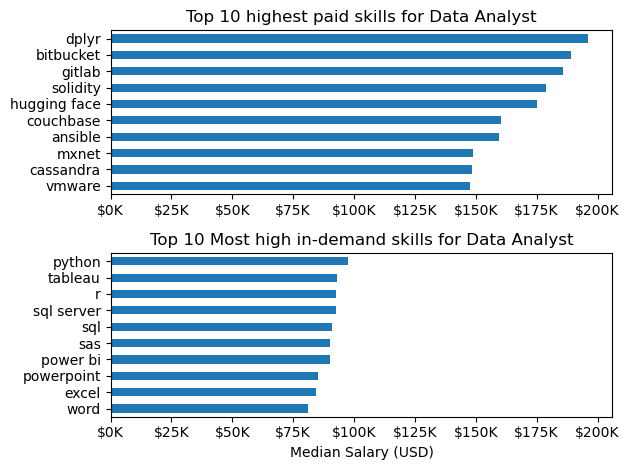

In [ ]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay = df_DA_group.sort_values(by='median', ascending=False).head(10)

df_DA_skill = df_DA_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

fig, ax = plt.subplots(2, 1)

# Top 10 Highest Paid Skills for data analyst
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 highest paid skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Top 10 Most high in-demand skills for data analyst
df_DA_skill[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most high in-demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) # set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

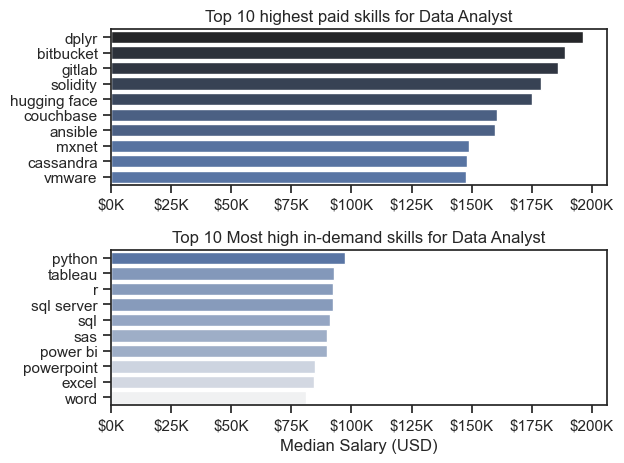

In [18]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay = df_DA_group.sort_values(by='median', ascending=False).head(10)

df_DA_skill = df_DA_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks") # makes it look more appeasing to eyes
# set_theme(): controls the style of all plots — fonts, background, grids, etc

# Top 10 Highest Paid Skills for data analyst
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r') 
# using barplot to make a bar graph 
# first thing to provide is the data shown on the screen - so use the df from which we are pulling data.
# x - what function we need, here we are specifying median
# y - here we providing the indexes for our case
# then define the ax for it so we can do a double plot
# hue - is used to color by group. for eg All petrol cars will be one color, All diesel cars will be another color, etc
# palette: Lets you control which colors are used when you use hue

ax[0].legend().remove()
ax[0].set_title('Top 10 highest paid skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))



sns.barplot(data=df_DA_skill, x='median', y=df_DA_skill.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most high in-demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) # set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()


# Histograms   

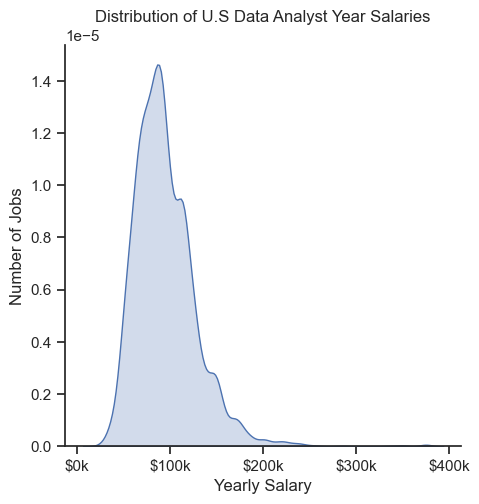

In [24]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy() 

# df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
# KDE is a smooth curve that estimates the probability distribution of your data.
# Instead of bars (like a histogram), it shows where the values are most dense.
# data	The DataFrame (e.g., df) that holds your data
# x	The column you want to plot on the x-axis
# kind	The type of plot: 'hist' (default), 'kde', or 'ecdf'

# formatting x axis.
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.title('Distribution of U.S Data Analyst Year Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary')
plt.show()

# Box Plots

In [29]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

#filter the data to appropriate job_titles
# Only get job_titles jobs in the US
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy() # basically stating that job_title_short has these titles which are present in job_titles
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles] # need to create a job_list variable which is needed to get the values to differe job_titles, like for Data Analyst different series of info and similar for other titles.


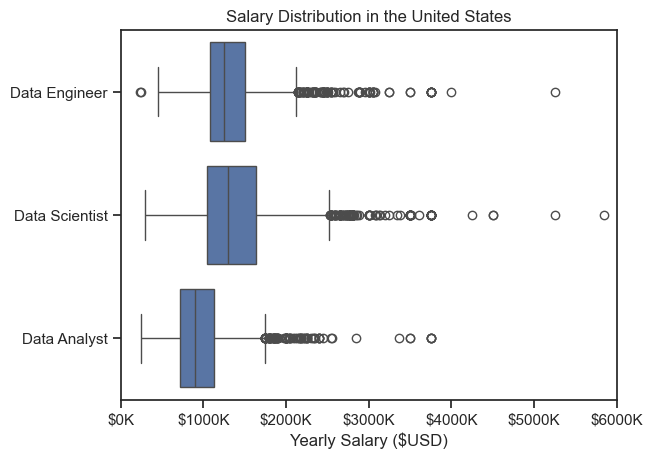

In [31]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/100)}K'))
plt.xlim(0, 600000)
plt.show()